In [ ]:
import pandas as pd
import numpy as np

In [31]:
# Data Loading
file_path = '2018_clean_final.csv'
flight_df = pd.read_csv(file_path, error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [32]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333528 entries, 0 to 333527
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FL_DATE              333528 non-null  object 
 1   OP_CARRIER           333528 non-null  object 
 2   CRS_DEP_TIME         333528 non-null  int64  
 3   DEP_DELAY            333528 non-null  float64
 4   TAXI_OUT             333528 non-null  float64
 5   WHEELS_OFF           333528 non-null  float64
 6   WHEELS_ON            333528 non-null  float64
 7   TAXI_IN              333528 non-null  float64
 8   CRS_ARR_TIME         333528 non-null  int64  
 9   ARR_DELAY            333528 non-null  float64
 10  CRS_ELAPSED_TIME     333528 non-null  float64
 11  ACTUAL_ELAPSED_TIME  333528 non-null  float64
 12  AIR_TIME             333528 non-null  float64
 13  DISTANCE             333528 non-null  float64
 14  CARRIER_DELAY        333528 non-null  float64
 15  WEATHER_DELAY    

In [34]:
flight_df.shape

(333528, 31)

In [35]:
flight_df.isnull().sum()


FL_DATE                0
OP_CARRIER             0
CRS_DEP_TIME           0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_DELAY              0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
Org_Airport            0
Org_latitude           0
Org_longitude          0
Origin_city            1
Dest_Airport           1
Dest_latitude          1
Dest_longitude         1
Dest_city              1
month                  1
Day                    1
MONTH_abbr             1
DELAY_STATUS           1
dtype: int64

In [36]:
flight_df = flight_df.dropna()

In [37]:
flight_df.isnull().sum()

FL_DATE                0
OP_CARRIER             0
CRS_DEP_TIME           0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_DELAY              0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
Org_Airport            0
Org_latitude           0
Org_longitude          0
Origin_city            0
Dest_Airport           0
Dest_latitude          0
Dest_longitude         0
Dest_city              0
month                  0
Day                    0
MONTH_abbr             0
DELAY_STATUS           0
dtype: int64

In [38]:
flight_df['FL_DATE'] = pd.to_datetime(flight_df['FL_DATE'])
flight_df['WEEKDAY'] = flight_df['FL_DATE'].dt.dayofweek
flight_df.columns

Index(['FL_DATE', 'OP_CARRIER', 'CRS_DEP_TIME', 'DEP_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_DELAY',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY', 'Org_Airport', 'Org_latitude', 'Org_longitude',
       'Origin_city', 'Dest_Airport', 'Dest_latitude', 'Dest_longitude',
       'Dest_city', 'month', 'Day', 'MONTH_abbr', 'DELAY_STATUS', 'WEEKDAY'],
      dtype='object')

In [39]:
flight_df.WEEKDAY.value_counts()

0    49890
4    49523
3    49217
2    48255
1    47520
6    47351
5    41771
Name: WEEKDAY, dtype: int64

In [40]:
flight_df.head()

,FL_DATE,OP_CARRIER,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Org_Airport,Org_latitude,Org_longitude,Origin_city,Dest_Airport,Dest_latitude,Dest_longitude,Dest_city,month,Day,MONTH_abbr,DELAY_STATUS,WEEKDAY
0,2018-01-01,United Airlines,1517,-5.0,15.0,1527.0,1712.0,10.0,1745,-23.0,268.0,250.0,225.0,1605.0,0.0,0.0,0.0,0.0,0.0,Newark Liberty International Airport,40.692501,-74.168701,New York,Denver International Airport,39.861698,-104.672996,Denver,1.0,1.0,Jan,0.0,0
1,2018-01-01,United Airlines,1657,161.0,14.0,1952.0,2130.0,7.0,1925,132.0,268.0,239.0,218.0,1605.0,16.0,0.0,0.0,0.0,116.0,Newark Liberty International Airport,40.692501,-74.168701,New York,Denver International Airport,39.861698,-104.672996,Denver,1.0,1.0,Jan,1.0,0
2,2018-01-01,United Airlines,600,-1.0,14.0,613.0,806.0,6.0,835,-23.0,275.0,253.0,233.0,1605.0,0.0,0.0,0.0,0.0,0.0,Newark Liberty International Airport,40.692501,-74.168701,New York,Denver International Airport,39.861698,-104.672996,Denver,1.0,1.0,Jan,0.0,0
3,2018-01-01,United Airlines,1855,11.0,26.0,1932.0,2112.0,12.0,2126,-2.0,271.0,258.0,220.0,1605.0,0.0,0.0,0.0,0.0,0.0,Newark Liberty International Airport,40.692501,-74.168701,New York,Denver International Airport,39.861698,-104.672996,Denver,1.0,1.0,Jan,0.0,0
4,2018-01-01,United Airlines,1150,-1.0,13.0,1202.0,1353.0,7.0,1418,-18.0,268.0,251.0,231.0,1605.0,0.0,0.0,0.0,0.0,0.0,Newark Liberty International Airport,40.692501,-74.168701,New York,Denver International Airport,39.861698,-104.672996,Denver,1.0,1.0,Jan,0.0,0


In [41]:
flight_df['CRS_DEP_TIME'] = np.ceil(flight_df['CRS_DEP_TIME']/600).apply(int)
flight_df['WHEELS_OFF'] = np.ceil(flight_df['WHEELS_OFF']/600).apply(int) 
flight_df['WHEELS_ON'] = np.ceil(flight_df['WHEELS_ON']/600).apply(int)
flight_df['CRS_ARR_TIME'] = np.ceil(flight_df['CRS_ARR_TIME']/600).apply(int)

In [42]:
flight_df.CRS_DEP_TIME.value_counts(normalize=True)

2    0.374635
3    0.363584
4    0.184501
1    0.077280
Name: CRS_DEP_TIME, dtype: float64

In [43]:
flight_df.CRS_ARR_TIME.value_counts(normalize=True)

2    0.333880
3    0.324061
4    0.314730
1    0.027329
Name: CRS_ARR_TIME, dtype: float64

In [44]:
flight_df.head(2)

,FL_DATE,OP_CARRIER,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Org_Airport,Org_latitude,Org_longitude,Origin_city,Dest_Airport,Dest_latitude,Dest_longitude,Dest_city,month,Day,MONTH_abbr,DELAY_STATUS,WEEKDAY
0,2018-01-01,United Airlines,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,0.0,0.0,0.0,0.0,0.0,Newark Liberty International Airport,40.692501,-74.168701,New York,Denver International Airport,39.861698,-104.672996,Denver,1.0,1.0,Jan,0.0,0
1,2018-01-01,United Airlines,3,161.0,14.0,4,4,7.0,4,132.0,268.0,239.0,218.0,1605.0,16.0,0.0,0.0,0.0,116.0,Newark Liberty International Airport,40.692501,-74.168701,New York,Denver International Airport,39.861698,-104.672996,Denver,1.0,1.0,Jan,1.0,0


In [45]:
flight_df = flight_df.drop(['MONTH_abbr'], axis=1)
flight_df = flight_df.drop(['Day'], axis=1)
flight_df = flight_df.drop(['Dest_city'], axis=1)
flight_df = flight_df.drop(['Origin_city'], axis=1)
flight_df = flight_df.drop(['FL_DATE'], axis=1)
flight_df = flight_df.drop(['Dest_Airport'], axis=1)
flight_df = flight_df.drop(['Org_Airport'], axis=1)
flight_df = flight_df.drop(['Dest_latitude'], axis=1)
flight_df = flight_df.drop(['Dest_longitude'], axis=1)
flight_df = flight_df.drop(['Org_latitude'], axis=1)
flight_df = flight_df.drop(['Org_longitude'], axis=1)
flight_df = flight_df.drop(['month'], axis=1)
flight_df = flight_df.drop(['WEEKDAY'], axis=1)

In [46]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333527 entries, 0 to 333526
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   OP_CARRIER           333527 non-null  object 
 1   CRS_DEP_TIME         333527 non-null  int64  
 2   DEP_DELAY            333527 non-null  float64
 3   TAXI_OUT             333527 non-null  float64
 4   WHEELS_OFF           333527 non-null  int64  
 5   WHEELS_ON            333527 non-null  int64  
 6   TAXI_IN              333527 non-null  float64
 7   CRS_ARR_TIME         333527 non-null  int64  
 8   ARR_DELAY            333527 non-null  float64
 9   CRS_ELAPSED_TIME     333527 non-null  float64
 10  ACTUAL_ELAPSED_TIME  333527 non-null  float64
 11  AIR_TIME             333527 non-null  float64
 12  DISTANCE             333527 non-null  float64
 13  CARRIER_DELAY        333527 non-null  float64
 14  WEATHER_DELAY        333527 non-null  float64
 15  NAS_DELAY        

In [47]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Label encoding features to change categorical variables into numerical one
flight_df['OP_CARRIER'] = le.fit_transform(flight_df['OP_CARRIER'])


In [48]:
flight_df.head(2)



,OP_CARRIER,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DELAY_STATUS
0,15,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15,3,161.0,14.0,4,4,7.0,4,132.0,268.0,239.0,218.0,1605.0,16.0,0.0,0.0,0.0,116.0,1.0


In [49]:
flight_df['DELAY_STATUS'] = flight_df['DELAY_STATUS'].astype(int)

In [50]:
X = flight_df.drop(['DELAY_STATUS','ARR_DELAY','DEP_DELAY'], axis = 1)
X.shape

(333527, 16)

In [51]:
y = flight_df['DELAY_STATUS']
y.head(10)

0    0
1    1
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    1
Name: DELAY_STATUS, dtype: int64

In [52]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from imblearn.metrics import classification_report_imbalanced
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
from sklearn.metrics import balanced_accuracy_score
from imblearn.ensemble import EasyEnsembleClassifier


# Perform the split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 2)

# **Random Forest Classifier**

In [53]:
# instantiating the RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth=5)
forest.fit(X_train, y_train)

#check the accuracy score
forest.score(X_train, y_train)

forest.score(X_test, y_test)

# Test set predictions
pred = forest.predict(X_test)
print('Testing Accuracy for Random Forest Classifier:', accuracy_score(y_test, pred))

Testing Accuracy for Random Forest Classifier: 0.8198862671024095


In [54]:
print('Classificiation Report')
print('---------------------')
print(classification_report(y_test, pred))

Classificiation Report
---------------------
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     65295
           1       1.00      0.48      0.65     34764

    accuracy                           0.82    100059
   macro avg       0.89      0.74      0.76    100059
weighted avg       0.86      0.82      0.80    100059



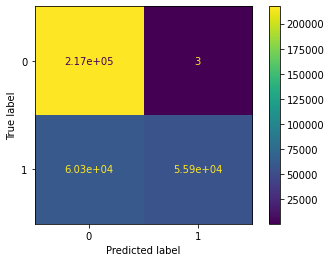

In [55]:
# Alternative confusion matrix
plot_confusion_matrix(forest, X, y , values_format='.3g')
plt.show()

In [56]:
# confusion matrix and classfication report
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,65294,1,65295
1,18021,16743,34764
All,83315,16744,100059


In [57]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(10, 20))
    plt.barh(range(n_features), model.feature_importances_, color='k', align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Features')
    plt.rcParams["figure.facecolor"] = "lightblue"
    plt.grid(True)

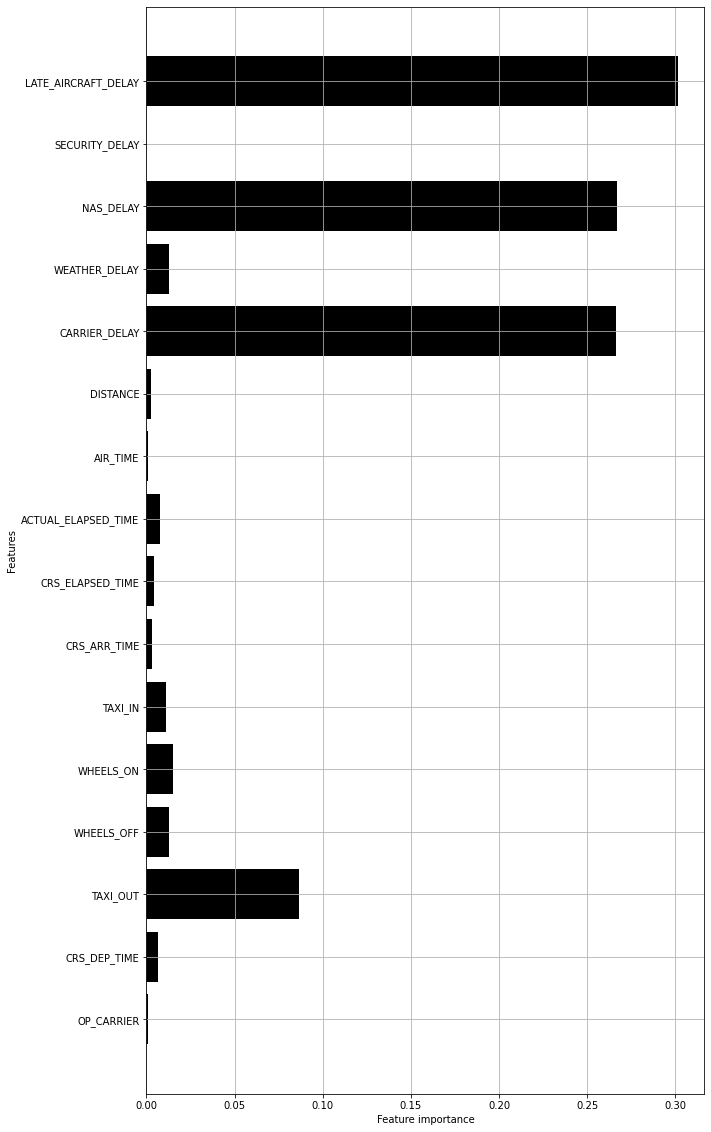

In [58]:
plot_feature_importances(forest)
plt.rcParams["figure.facecolor"] = "lightblue"

# **Logistic Regression**

In [59]:
classifier = LogisticRegression(solver='lbfgs',max_iter=200,random_state=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('Testing Accuracy for Logistic Regression:', accuracy_score(y_test, y_pred))

Testing Accuracy for Logistic Regression: 0.8804005636674362


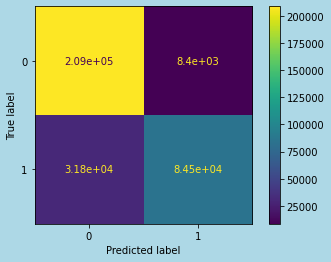

In [60]:
# Alternative confusion matrix
plot_confusion_matrix(classifier, X, y, values_format='.3g')
plt.show()

In [61]:
print('Classificiation Report')
print('---------------------')
print(classification_report(y_test, y_pred))

Classificiation Report
---------------------
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     65295
           1       0.91      0.73      0.81     34764

    accuracy                           0.88    100059
   macro avg       0.89      0.84      0.86    100059
weighted avg       0.88      0.88      0.88    100059



In [62]:
# confusion matrix and classfication report
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,62792,2503,65295
1,9464,25300,34764
All,72256,27803,100059


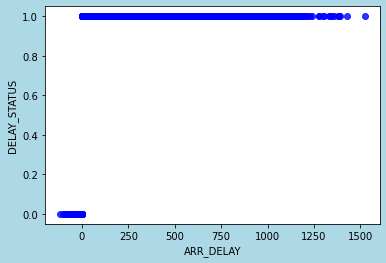

In [82]:
#plot logistic regression curve
import seaborn as sns
sns.regplot(x=flight_df['ARR_DELAY'] , y= flight_df['DELAY_STATUS'] , data= flight_df , logistic=True, ci=None ,scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

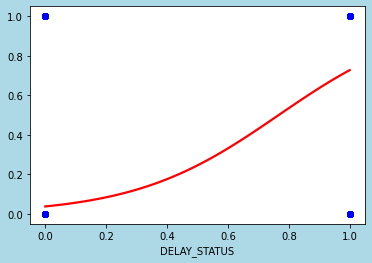

In [83]:
#logistic regression curve

sns.regplot(x= y_test , y= y_pred , logistic=True, ci=None ,scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})